In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
data = pd.read_csv("data/nhanes_2015_2016.csv")
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


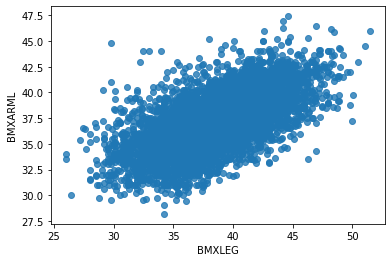

In [9]:
# scatterplot of Y - BMXARML  (arm length) against X - BMXLEG (leg length)
sns.regplot(x="BMXLEG", y="BMXARML",  data=data, fit_reg =False)

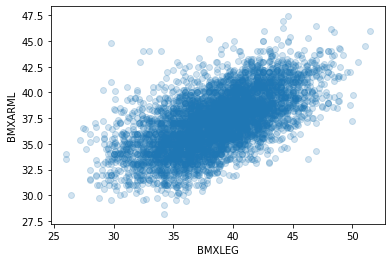

In [10]:
# deixando os pontos transparentes
sns.regplot(x="BMXLEG", y="BMXARML", data=data, fit_reg =False, scatter_kws={"alpha": 0.2})

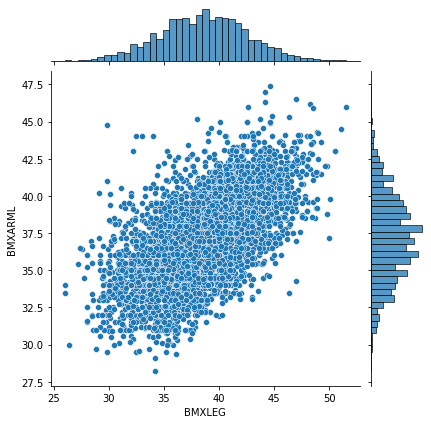

In [11]:
# gráfico com a densidade dos pontos da correlação
sns.jointplot(x="BMXLEG", y="BMXARML", data=data)

In [16]:
# Relação entre tamanhã do braço e da perna dividido por gênero
print(data.RIAGENDR)

0       1
1       1
2       1
3       2
4       2
       ..
5730    2
5731    1
5732    2
5733    1
5734    2
Name: RIAGENDR, Length: 5735, dtype: int64


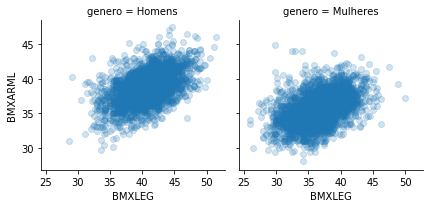

In [21]:
data['genero'] = data.RIAGENDR.replace({1:"Homens", 2: "Mulheres"})
sns.FacetGrid(data, col="genero").map(plt.scatter,"BMXLEG", "BMXARML", alpha= 0.2).add_legend()

In [22]:
# Correlação
print(data.loc[data.genero=="Mulheres", ["BMXLEG", "BMXARML"]].dropna().corr())
print(data.loc[data.genero=="Homens", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


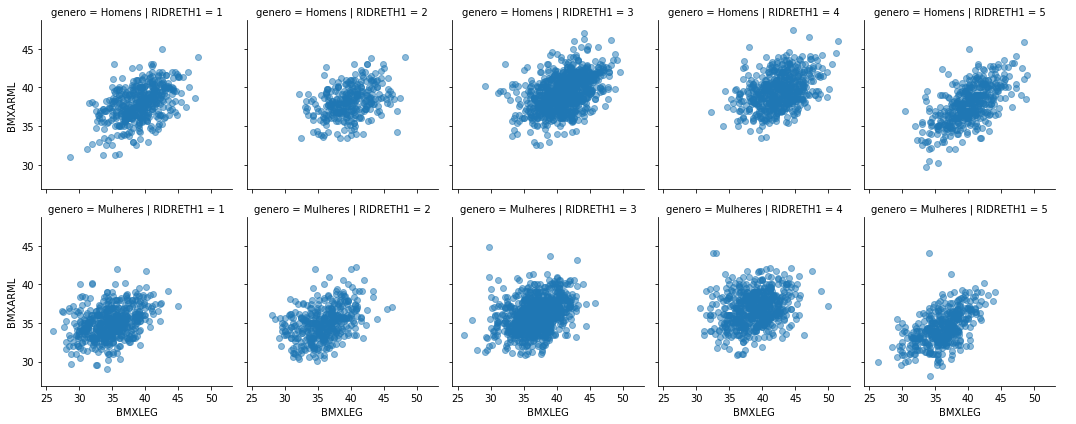

In [24]:
sns.FacetGrid(data, col="RIDRETH1",  row="genero").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()